In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(ride, city, on="city", how="left")

# Display the data table for preview
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

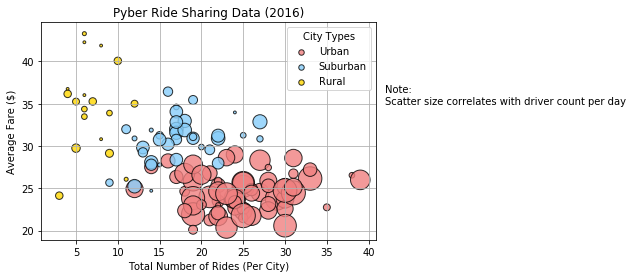

In [68]:
# Obtain the x and y coordinates for each of the three city types
grouped = merged.groupby(['type','city'])
x = grouped['ride_id'].count()
y = grouped['fare'].mean()
dcount = grouped['driver_count'].mean() # average driver count per city calculated for use in scatter size (s)


# Build the scatter plots for each city types
types = merged['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']
cl_dict = {} # initializing dictionary corresponding colors to types
c = 0

for type in types:
    plt.scatter(x.loc[type,:], y.loc[type,:], facecolors=colors[c], edgecolors='black', label=type,
                s=dcount[type]*8, alpha=0.8, linewidths=1)
    
    cl_dict[type] = colors[c] # build dictionary assigning colors to types for future use
    
    c = (c + 1)%len(colors) 
    # with mod 3 if we had more than 3 types the colors would loop back to the first one 'lightcoral'. 
    # In such occasion it's probably more useful to add more colors to the list, but currently not needed.

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title='City Types')

for i in range(len(typelist)): # Adjust the marker sizes to be equal to each other in the legend
    legend.legendHandles[i]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nScatter size correlates with driver count per day")

# Save Figure
plt.savefig("Images/ScatterPlot.png", bbox_inches = "tight")

In [69]:
# Show plot
plt.show()

## Total Fares by City Type

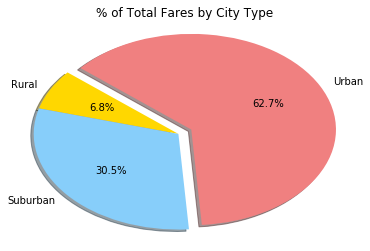

In [70]:
# Calculate Type Percents
fare_percent = merged.groupby(['type'])['fare'].sum()/merged['fare'].sum()
types = fare_percent.index.values # new order of types for the pie

colors=[] # reset color order to correspond to previous color coding
colors += [cl_dict[type] for type in types]

# Build Pie Chart
plt.pie(fare_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1), shadow=True)
plt.title("% of Total Fares by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("Images/PieFares.png")


In [71]:
# Show Figure
plt.show()

## Total Rides by City Type

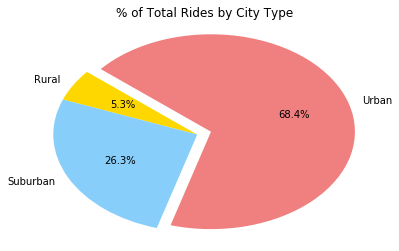

In [72]:
# Calculate Ride Percents
ride_percent = merged.groupby(['type'])['ride_id'].count()/merged['ride_id'].count()
types = ride_percent.index.values # new order of types for the pie

colors=[] # reset color order to correspond to previous color coding
colors += [cl_dict[type] for type in types]
    
# Build Pie Chart
plt.pie(ride_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1))
plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("Images/PieRides.png")

In [73]:
# Show Figure
plt.show()

## Total Drivers by City Type

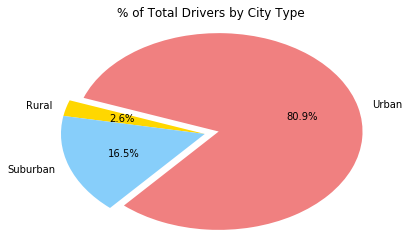

In [74]:
# Calculate Driver Percents
driver_percent = city.groupby(['type'])['driver_count'].sum()/city['driver_count'].sum()
types = driver_percent.index.values # new order of types for the pie

colors=[] # reset color order to correspond to previous color coding
colors += [cl_dict[type] for type in types]
 
# Build Pie Charts
plt.pie(driver_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=160, explode=(0, 0, 0.1))
plt.title("% of Total Drivers by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("Images/PieDrivers.png")

In [75]:
# Show Figure
plt.show()

## Observable Trends
1. Urban areas have the most drivers, and the most rides, however the percentage of rides is lower than the percentage of drivers, therefore showing that urban drivers take fewer rides per person, possibly due to competition.
2. Rural and Suburban rides have a higher contribution to the fares than their percentage of rides is, while Urban rides contribute lower. This is due to a higher average fare, which could be both due to longer rides and lower competition in the rural and suburban areas. We would need more data about the average duration/length of the ride per type, as well as the rate charged in different areas in order to determine which was the most important factor.
3. As shown in the scatter plot, the bulk of the rural cities have similar average fare to the suburban cities, with only four rural cities driving the average higher. 